In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
#cleaning our data
df = pd.read_csv('churn_clean.csv')
df = pd.get_dummies(df)
df = df[['Income','Outage_sec_perweek','MonthlyCharge', 'Bandwidth_GB_Year']]
df.head()

,Income,Outage_sec_perweek,MonthlyCharge,Bandwidth_GB_Year
0,28561.99,7.978323,172.455519,904.536110
1,21704.77,11.699080,242.632554,800.982766
2,9609.57,10.752800,159.947583,2054.706961
3,18925.23,14.913540,119.956840,2164.579412
4,40074.19,8.147417,149.948316,271.493436


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
scaled_data_clean = pd.DataFrame(df_scaled,columns=df.columns[:])

scaled_data_clean.head()
scaled_data_clean.to_csv ('cleaned_data_d212_task2.csv')

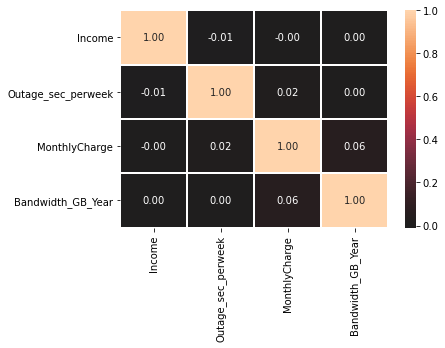

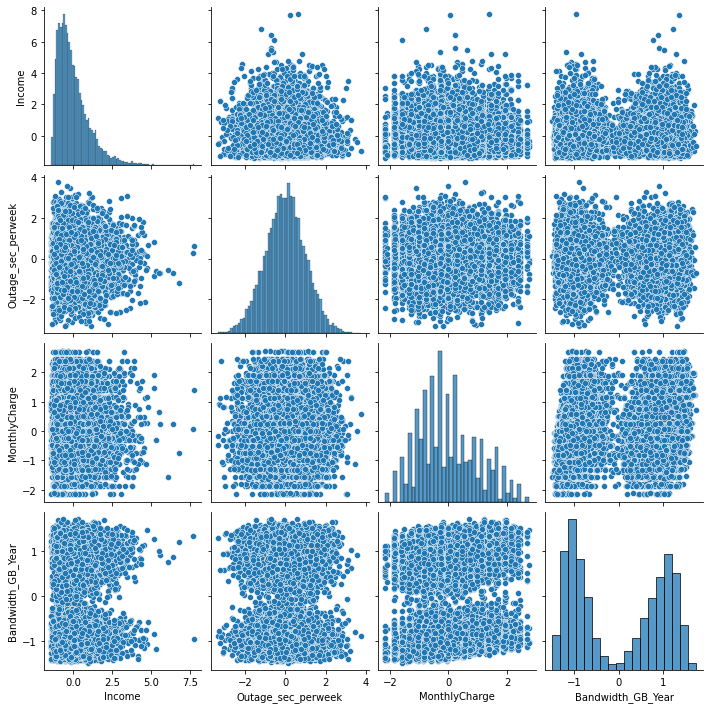

In [62]:
# Create the correlation matrix
corr = scaled_data_clean.corr()

# Draw the heatmap
sns.heatmap(corr,center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

sns.pairplot(scaled_data_clean)

In [63]:
# Apply PCA
pca = PCA(n_components=4)
pca.fit(df_scaled)


PCA(n_components=4)

In [64]:
print(pca.explained_variance_ratio_)

[0.26630939 0.25232583 0.24705087 0.23431391]


In [65]:
print(pca.explained_variance_ratio_.cumsum())

[0.26630939 0.51863522 0.76568609 1.        ]


In [66]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
pc_df = pd.DataFrame(['PC1', 'PC2', 'PC3','PC4'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,PC1,0.266309,0.266
1,PC2,0.252326,0.518
2,PC3,0.247051,0.765
3,PC4,0.234314,0.999


Text(0.5, 1.0, 'Scree Plot')

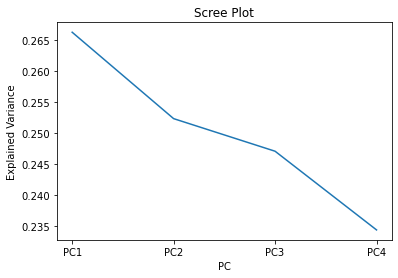

In [67]:
sns.lineplot(x='PC',y='Explained Variance',data=df_explained_variance).set_title('Scree Plot')

Text(0.5, 1.0, 'Total Variance')

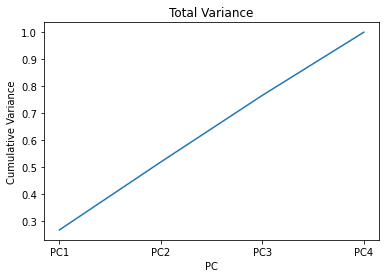

In [68]:
sns.lineplot(x='PC',y='Cumulative Variance',data=df_explained_variance).set_title('Total Variance')

In [69]:
# Apply PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.26630939 0.25232583]
[0.26630939 0.51863522]


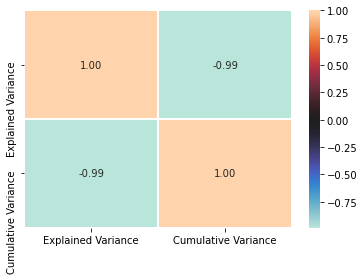

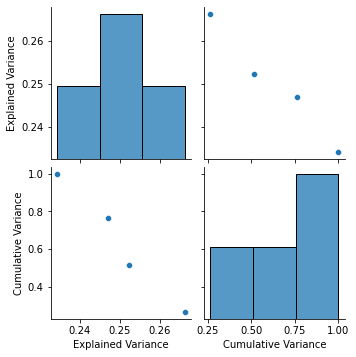

In [70]:
# Create the correlation matrix
corr = df_explained_variance.corr()

# Draw the heatmap
sns.heatmap(corr,center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

sns.pairplot(df_explained_variance)